In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement_Data.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data Preprocessing

In [4]:
#checking null values

dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
#From above analysis we came to know that salary column has 67 NaN values
#And also we found out that candidates who are not placed, where not getting salary
#Hence 67 candidates were not placed out of 215 candidates

In [6]:
#Replacing null values
#Based on nature of dataset, Null values can be replaced using below any one of the methods
#Replacing NUN values to Zero
#Deleting Entire Column
#Using Measure of central tenancy method (Finding Mean or Mode or Median)
#Considering it as semi supervised model and creating a model

dataset["salary"].fillna(0,inplace=True)

In [7]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [8]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# Finding Outlier and Replacing it

In [9]:
#Seperate Quan and Qual

quan=[]
qual=[]
for columnName in dataset.columns:
    print(columnName)
    if(dataset[columnName].dtype=='O'):
        print("qual")
        qual.append(columnName)
    else:
        print("quan")
        quan.append(columnName)

sl_no
quan
gender
qual
ssc_p
quan
ssc_b
qual
hsc_p
quan
hsc_b
qual
hsc_s
qual
degree_p
quan
degree_t
qual
workex
qual
etest_p
quan
specialisation
qual
mba_p
quan
status
qual
salary
quan


In [10]:
import numpy as np

In [11]:
#Perform descriptive analysis

descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1=25%","Q2=50%",
                                "Q3=75%","99%","Q4=100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
for columnName in quan:    
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1=25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2=50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3=75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
    descriptive[columnName]["Q4=100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3=75%"]-descriptive[columnName]["Q1=25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1=25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3=75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

In [12]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [13]:
#There are one lesser outlier and three greater ouylier present in dataset

lesser

['hsc_p']

In [14]:
greater

['hsc_p', 'degree_p', 'salary']

In [15]:
#Replacing Outlier

for columnName in lesser:
    dataset[columnName][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in greater:
    dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]

C:\Users\Rajesh\Anaconda3\envs\krishAI\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Rajesh\Anaconda3\envs\krishAI\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#crosschecking whether outlier removed or not

descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1=25%","Q2=50%",
                                "Q3=75%","98%","Q4=100%","IQR","1.5rule","Lesser","Greater","Min","Max","kurtosis","skew","Var","Std"],columns=quan)
for columnName in quan:    
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1=25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2=50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3=75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["98%"]=np.percentile(dataset[columnName],98)
    descriptive[columnName]["Q4=100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3=75%"]-descriptive[columnName]["Q1=25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1=25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3=75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()
    descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
    descriptive[columnName]["skew"]=dataset[columnName].skew()
    descriptive[columnName]["Var"]=dataset[columnName].var()
    descriptive[columnName]["Std"]=dataset[columnName].std()

In [17]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67.3034,66.3347,66.3586,72.1006,62.2782,197615
Median,108,67,65,66,71,62,240000
Mode,1,62,63,65,60,56.7,0
Q1=25%,54.5,60.6,60.9,61,60,57.945,0
Q2=50%,108,67,65,66,71,62,240000
Q3=75%,161.5,75.7,73,72,83.5,66.255,282500
98%,210.72,86.86,90.648,81.72,96.576,74.5404,500000
Q4=100%,215,89.4,91.15,88.5,98,77.89,706250
IQR,107,15.1,12.1,11,23.5,8.31,282500
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,423750


In [18]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [19]:
lesser

[]

In [20]:
greater

[]

In [22]:
dataset["salary"].fillna(dataset["salary"].mean(),inplace=True)

In [23]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [24]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset[quan])
df=imp.transform(dataset[quan])
df = pd.DataFrame(df,columns = quan)

In [25]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [26]:
cate=dataset[qual]

In [27]:
cate

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [28]:
#Merging Qual and Qual data

two=[df,cate]

In [32]:
#using concat

preprocessed=pd.concat(two,axis=1)

In [33]:
preprocessed

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [34]:
preprocessed.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

C:\Users\Rajesh\Anaconda3\envs\krishAI\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


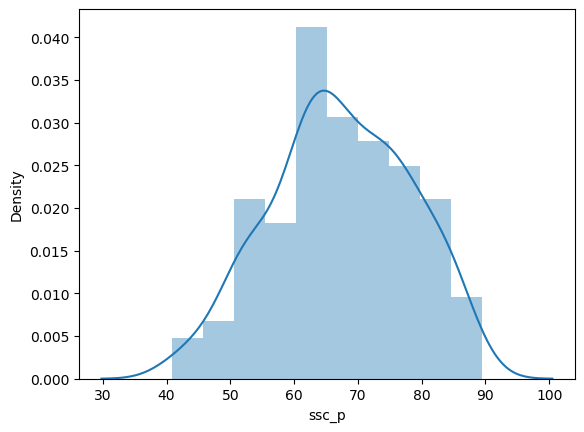

In [36]:
import seaborn as sns
sns.distplot(dataset["ssc_p"])

In [42]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'Blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample = dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    dist = norm(sample_mean, sample_std)
    
    values=[value for value in range(startrange,endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Rajesh\Anaconda3\envs\krishAI\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=197615.116, Standard Deviation=150305.844
The area between range(700000,900000):0.0004137812663830048


0.0004137812663830048

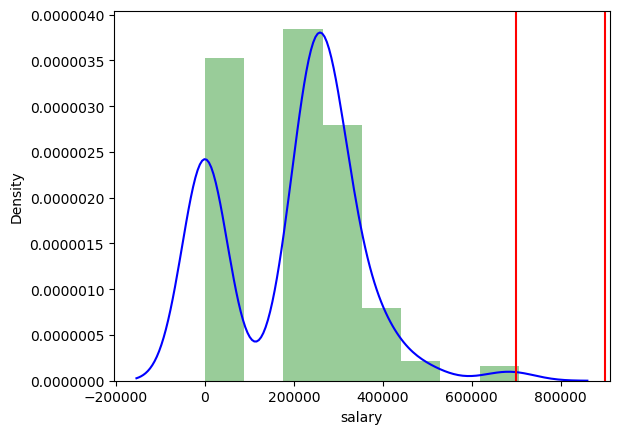

In [43]:
get_pdf_probability(dataset["salary"],700000,900000)

In [47]:
# Converting Normal distribution to Standard normal distribution function

def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

C:\Users\Rajesh\Anaconda3\envs\krishAI\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":


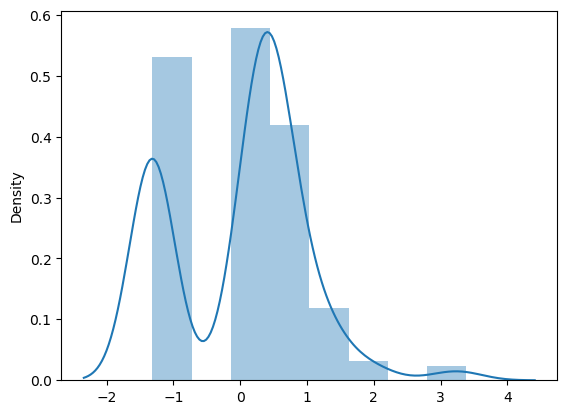

In [48]:
stdNBgraph(dataset["salary"])

In [49]:
#Covariance and Corelation

dataset.cov()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-59.598879,-41.465047,52.556168,8.102336,1.138318e+04
ssc_p,-52.641355,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,-59.598879,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,-41.465047,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,52.556168,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,8.102336,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,11383.177570,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [50]:
dataset.corr()

# ssc_p is highly correlated with Salary (56%)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [57]:
# Ttest
# Indpendant and Dependant Sample

from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree_t = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree_t,specialisation)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

In [58]:
from scipy.stats import ttest_rel
degree_t = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree_t1 = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(degree_t,degree_t1)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

In [ ]:
# Hypothesis Testing

# Ho = Null Hypothesis = There is no significance difference, 
# H1 = Alternate Hypothesis = There is a significance difference
# Reject Null Hypothesis, if p<0.05

In [56]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [ ]:
# Here p value is greater than 0.05, hence accept Null hypothesis and reject Alternate hypothesis
# There is no significance difference between etest_p and mba_p

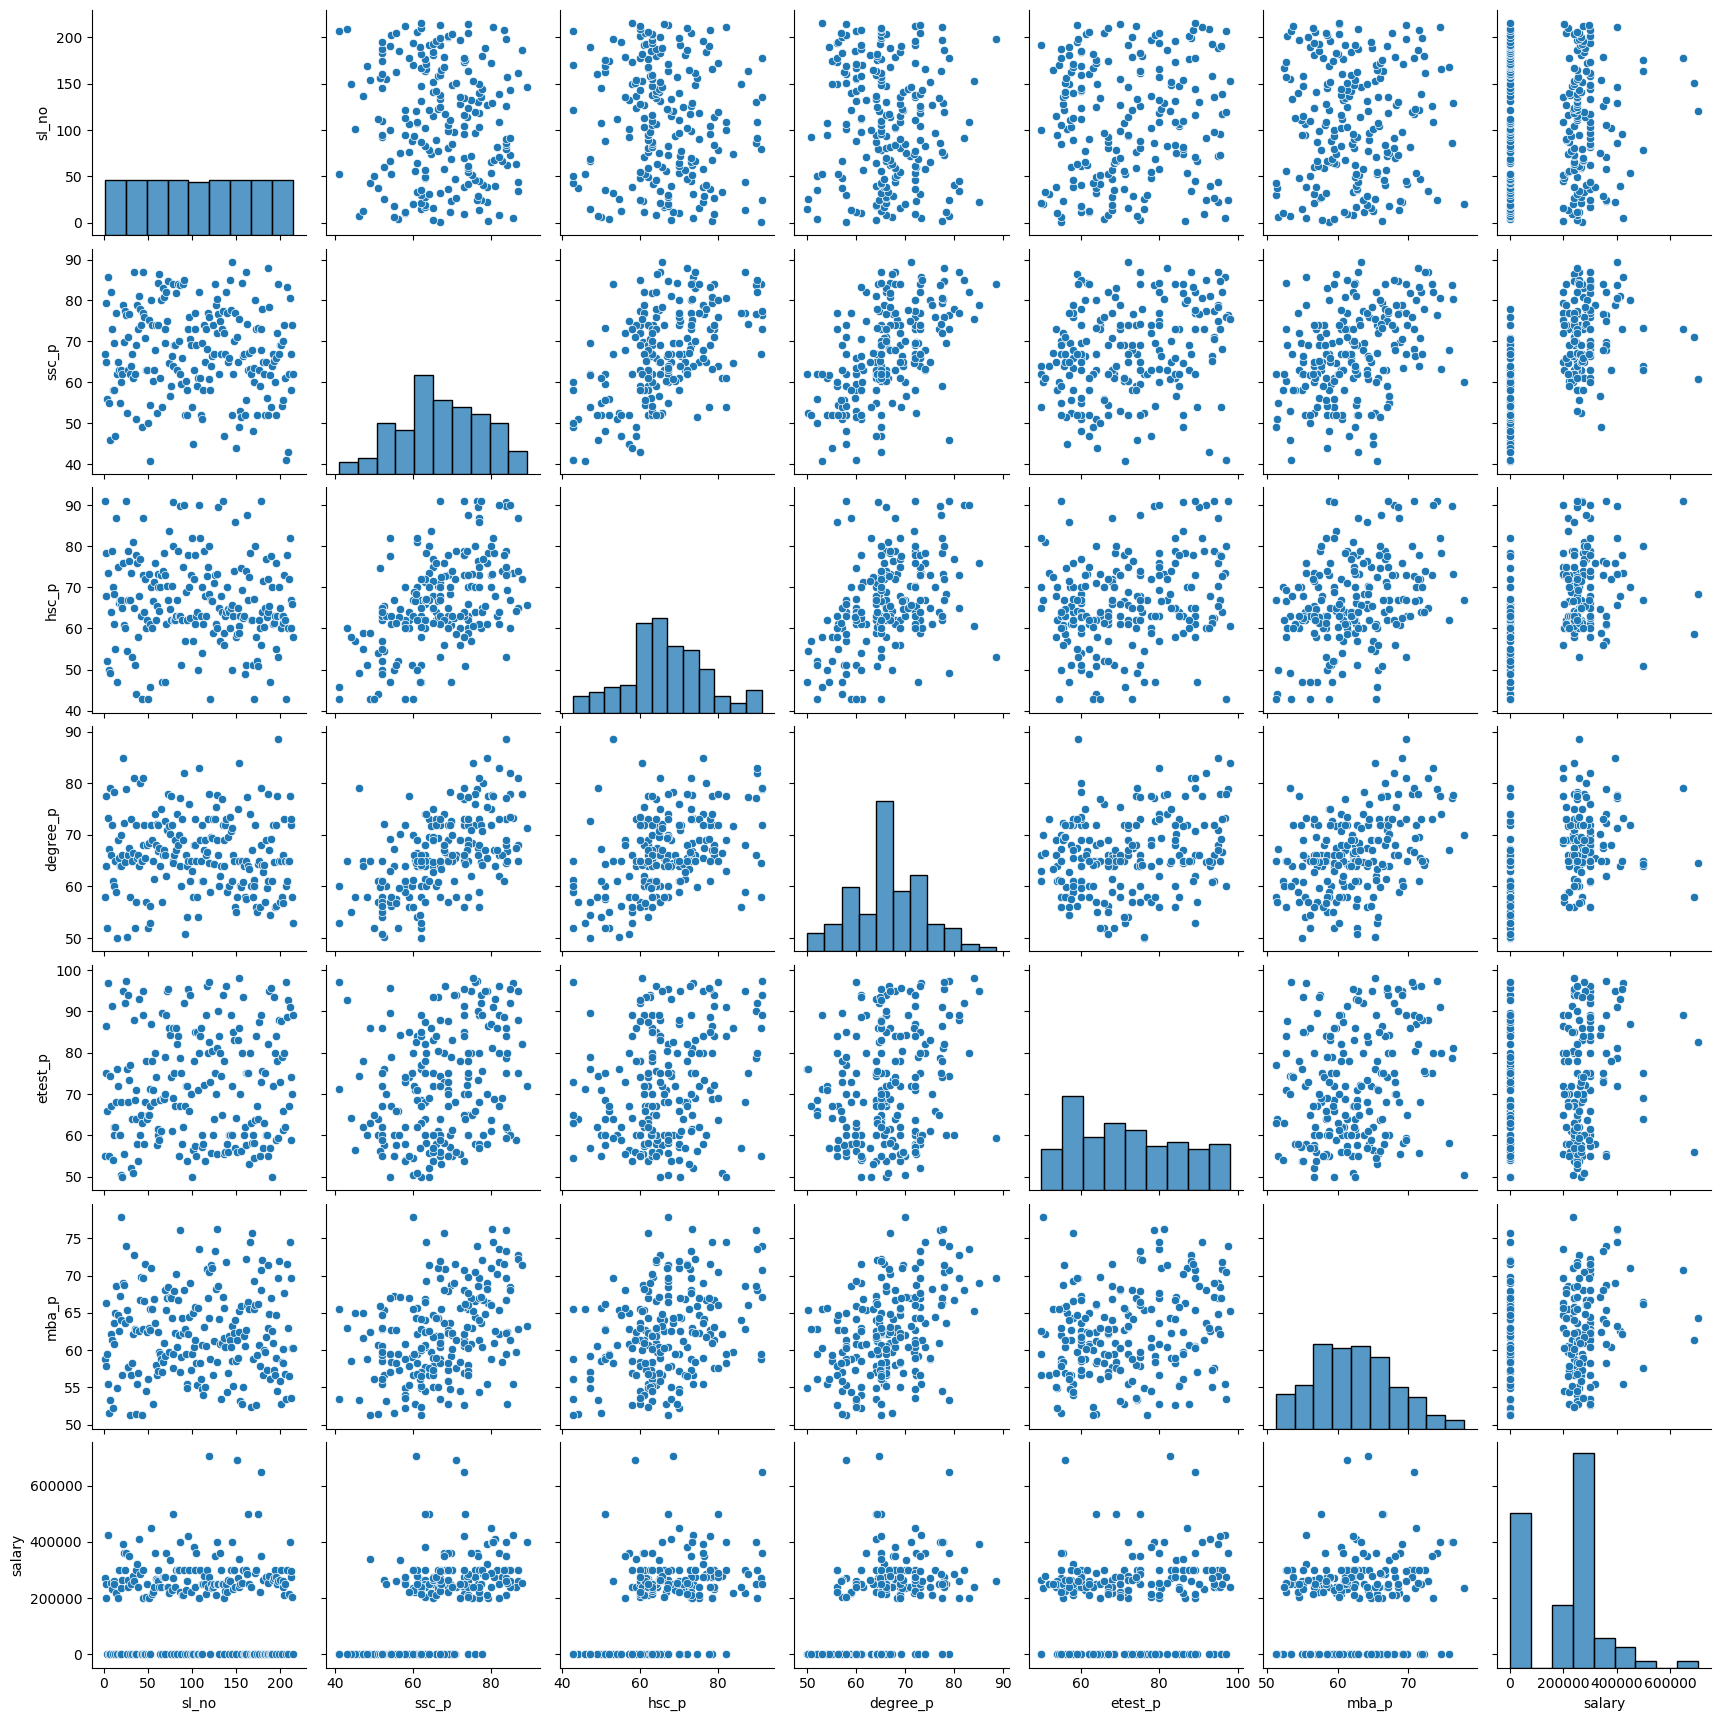

In [59]:
# Pairplot Visualisation

import seaborn as sns
sns.pairplot(dataset)